# ABOUT THE DATA

# CONTEXT
* This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the   dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements         included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In     particular, all patients here are females at least 21 years old of Pima Indian heritage.

# CONTENT
* The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables           includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

https://www.kaggle.com/uciml/pima-indians-diabetes-database

# Columns
* Pregnancies - Number of times pregnant
* Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure - Diastolic blood pressure (mm Hg)
* SkinThickness - Triceps skin fold thickness (mm)
* Insulin - 2-Hour serum insulin (mu U/ml)
* BMI - Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction - Diabetes pedigree function
* Age - Age (years)
* Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0

https://www.kaggle.com/uciml/pima-indians-diabetes-database

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('diabetes.csv')
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# MEDICAL DATA OFTEN CONSIST NULL VALUES SO, WE NEED TO FIND OUT ARE THERE ANY NULL VALUES.
# AS WE CAN SEE THERE ARE MANY 0 VALUES IN OUR DATASET.

In [6]:
X = data.drop(['Outcome'], axis = 1)
y = data['Outcome']

In [7]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
X_new = X.replace(0, np.nan)

In [9]:
X_new.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

# USING MEAN, MEDIAN TECHNIQUE TO FILL THE MISSING VALUES

In [10]:
X_new['Pregnancies'].fillna(X_new['Pregnancies'].mean(), inplace = True)
X_new['Glucose'].fillna(X_new['Glucose'].mean(), inplace = True)
X_new['BloodPressure'].fillna(X_new['BloodPressure'].mean(), inplace = True)
X_new['SkinThickness'].fillna(X_new['SkinThickness'].median(), inplace = True)
X_new['Insulin'].fillna(X_new['Insulin'].median(), inplace = True)
X_new['BMI'].fillna(X_new['BMI'].median(), inplace = True)

# HISTOGRAM

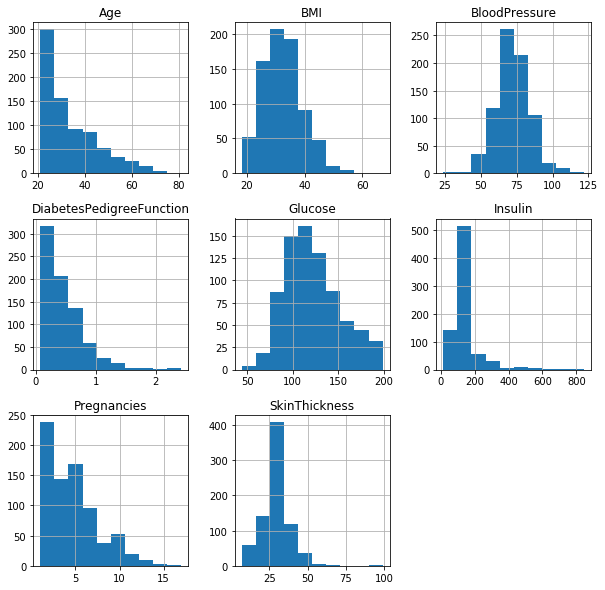

In [11]:
p = X_new.hist(figsize = (10, 10))

# VALUE COUNTS

0    500
1    268
Name: Outcome, dtype: int64


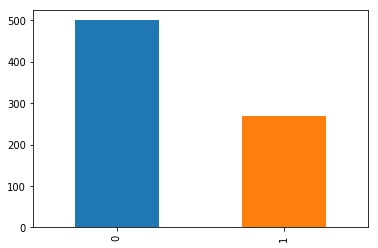

In [12]:
print(y.value_counts())
p = y.value_counts().plot(kind = "bar")

# HEATMAP FOR DATA

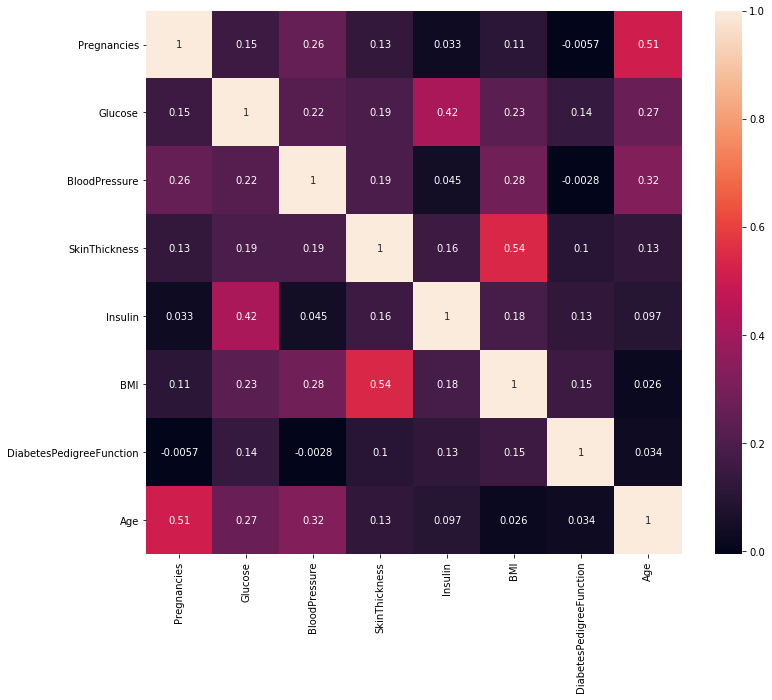

In [13]:
plt.figure(figsize = (12,10))  
p = sns.heatmap(X_new.corr(), annot = True)

# HEATMAP FOR DATA INCLUDING 'OUTCOME'

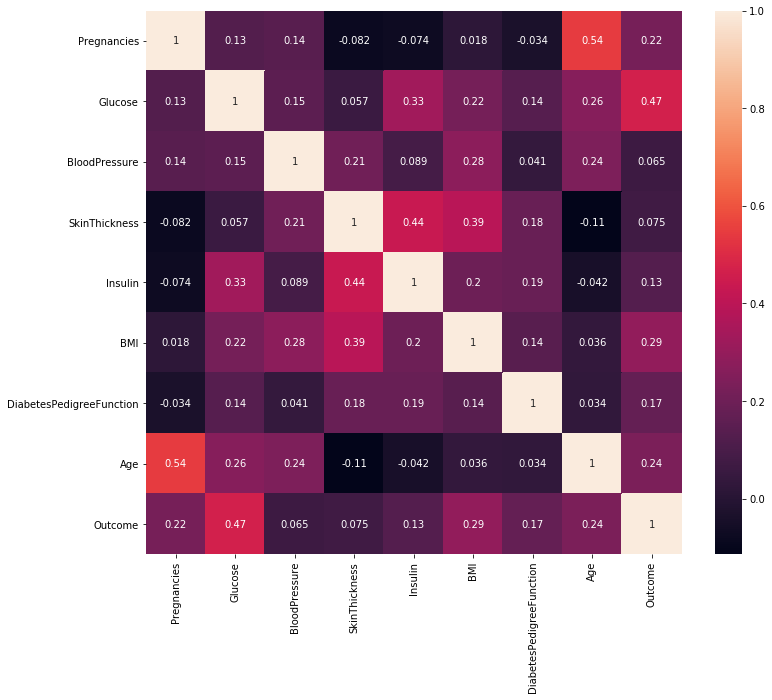

In [14]:
plt.figure(figsize = (12,10))  
p = sns.heatmap(data.corr(), annot = True)

# SCALING WITH QUANTILE TRANSFORM

In [15]:
from sklearn.preprocessing import QuantileTransformer 
qt = QuantileTransformer(output_distribution = 'normal', random_state = 0)
X_qt = pd.DataFrame(X_new, columns = ['Pregnancies', 'Glucose', 'Insulin',
                   'BMI', 'DiabetesPedigreeFunction', 'Age'])
X_qt_new = qt.fit_transform(X_qt)

In [29]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_qt_new, y, test_size = 0.33, stratify = y)
X_train1, X_cv1, y_train1, y_cv1 = train_test_split(X_train1, y_train1, test_size = 0.33, stratify = y_train1)

# KNN WITH QUANTILE TRANSFORM

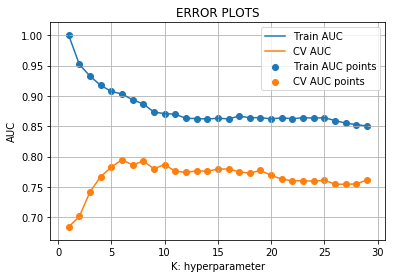

In [76]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc1 = []
cv_auc1 = []
K1 = np.arange(1, 30)
for i in K1:
    knn1 = KNeighborsClassifier(n_neighbors = i, algorithm = 'auto')
    knn1.fit(X_train1, y_train1)

    y_train_pred1 = knn1.predict_proba(X_train1)[:, 1]    
    y_cv_pred1 = knn1.predict_proba(X_cv1)[:, 1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc1.append(roc_auc_score(y_train1, y_train_pred1))
    cv_auc1.append(roc_auc_score(y_cv1, y_cv_pred1))

plt.plot(K1, train_auc1, label='Train AUC')
plt.plot(K1, cv_auc1, label='CV AUC')

plt.scatter(K1, train_auc1, label='Train AUC points')
plt.scatter(K1, cv_auc1, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# APPLYING GRAPH RESULT INTO THE TEST SET

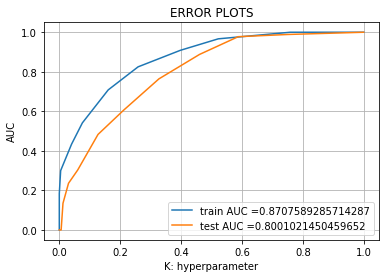

In [77]:
from sklearn.metrics import roc_curve, auc


knn1 = KNeighborsClassifier(n_neighbors = 10)
knn1.fit(X_train1, y_train1)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred1 = knn1.predict_proba(X_train1)[:, 1]    
y_test_pred1 = knn1.predict_proba(X_test1)[:, 1]

train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train1, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test1, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [78]:
def predict(proba1, threshould1, fpr1, tpr1):
    
    t1 = threshould1[np.argmax(fpr1*(1-tpr1))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr1*(1-fpr1)", max(tpr1*(1-fpr1)), "for threshold1", np.round(t1,3))
    predictions1 = []
    for i in proba1:
        if i>=t1:
            predictions1.append(1)
        else:
            predictions1.append(0)
    return predictions1

In [79]:
from sklearn.metrics import confusion_matrix

g = confusion_matrix(y_train1, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_fpr1))
h = confusion_matrix(y_test1, predict(y_test_pred1, tr_thresholds1, test_fpr1, test_fpr1))


the maximum value of tpr1*(1-fpr1) 0.24950175382653061 for threshold1 0.2
the maximum value of tpr1*(1-fpr1) 0.2484481175390266 for threshold1 0.3


# CONFUSION MATRIX

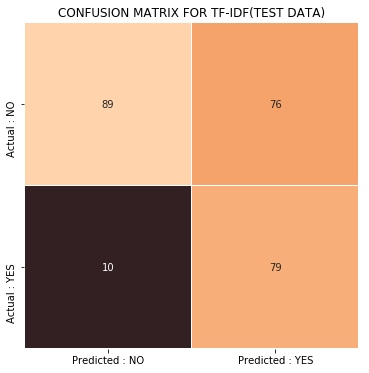

In [80]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(h, columns = ['Predicted : NO', 'Predicted : YES'],
                  index = ['Actual : NO', 'Actual : YES'])
plt.figure(figsize = (6,6))
plt.title('CONFUSION MATRIX FOR TF-IDF(TEST DATA)')
sn.heatmap(df_cm, center = 0, annot = True, linewidths=.5, cbar = False, fmt = '.0f')

# CLASSIFICATION REPORT

In [81]:
y_pred1 = knn1.predict(X_test1)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.65      0.75      0.69       165
           1       0.34      0.25      0.29        89

   micro avg       0.57      0.57      0.57       254
   macro avg       0.50      0.50      0.49       254
weighted avg       0.54      0.57      0.55       254



# SCALING WITH STANDARD SCALER

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_ss =  pd.DataFrame(X_new, columns = ['Pregnancies', 'Glucose', 'Insulin',
                   'BMI', 'DiabetesPedigreeFunction', 'Age'])
X_ss_new = ss.fit_transform(X_ss)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# SPLITTING THE DATA (STRATIFIED)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ss_new, y, test_size = 0.33, stratify = y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.33, stratify = y_train)

# K - NearestNeighbor

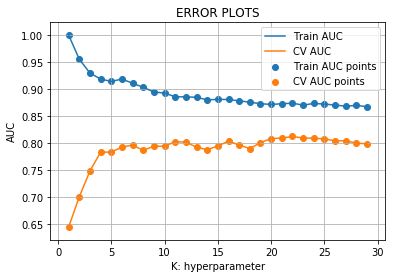

In [82]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = np.arange(1, 30)
for i in K:
    knn = KNeighborsClassifier(n_neighbors=i, algorithm = 'auto')
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict_proba(X_train)[:, 1]    
    y_cv_pred = knn.predict_proba(X_cv)[:, 1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

* TAKING 21 AS THE HYPERPARAMTER BECAUSE AS WE CAN SEE, RESULT ISNT CHANGING MUCH AFTER 21. 

# APPLYING THE GRAPH RESULT INTO THE TEST SET

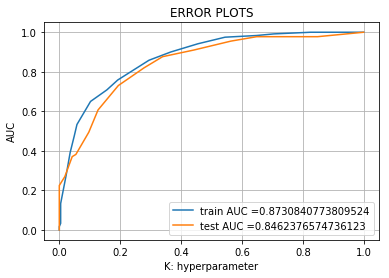

In [83]:
from sklearn.metrics import roc_curve, auc


knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = knn.predict_proba(X_train)[:, 1]    
y_test_pred = knn.predict_proba(X_test)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [84]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [85]:
from sklearn.metrics import confusion_matrix
i = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
j = confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))

the maximum value of tpr*(1-fpr) 0.24800701530612249 for threshold 0.238
the maximum value of tpr*(1-fpr) 0.24668503213957763 for threshold 0.19


# CONFUSION MATRIX

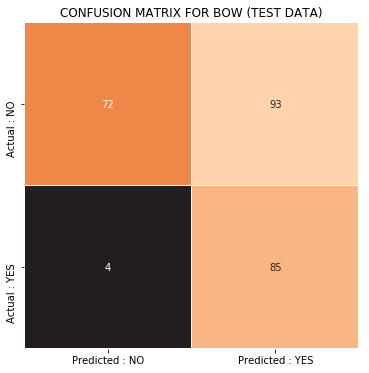

In [86]:
# Reference for heatmap was taken from seaborn heatmap documentation
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(j, columns = ['Predicted : NO', 'Predicted : YES'],
                  index = ['Actual : NO', 'Actual : YES'])
plt.figure(figsize = (6,6))
plt.title('CONFUSION MATRIX FOR BOW (TEST DATA)')
sn.heatmap(df_cm, center = 0, annot = True, linewidths=.5, cbar = False, fmt = '.0f')

# CLASSIFICATION REPORT

In [87]:
y_pred = knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       165
           1       0.79      0.38      0.52        89

   micro avg       0.75      0.75      0.75       254
   macro avg       0.77      0.66      0.67       254
weighted avg       0.76      0.75      0.72       254



# LOGISTIC REGRESSION

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-pa

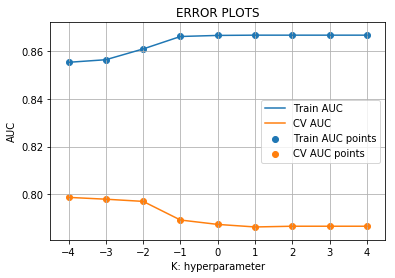

In [96]:
# Applying LogisticRegression 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import roc_auc_score


train_auc = []
cv_auc = []
C = [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]
for a in C:
    lr = LR(C = a, penalty = 'l2', class_weight = 'balanced')
    lr.fit(X_train, y_train)

    y_train_pred = lr.predict_proba(X_train)[:, 1] 
    y_cv_pred = lr.predict_proba(X_cv)[:, 1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(np.log10(C), train_auc, label='Train AUC')
plt.plot(np.log10(C), cv_auc, label='CV AUC')

plt.scatter(np.log10(C), train_auc, label='Train AUC points')
plt.scatter(np.log10(C), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# GRIDSEARCH

In [103]:
#https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/
from sklearn.model_selection import GridSearchCV
gds = GridSearchCV(estimator = lr, param_grid = dict(C = C), scoring = 'accuracy', cv = 10)
gds = gds.fit(X_train, y_train)
print(gds.best_score_)
print(gds.best_estimator_.C)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-pa

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-pa

0.7965116279069767
0.01


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# APPLYING GRIDSEARCH RESULT TEST SET

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


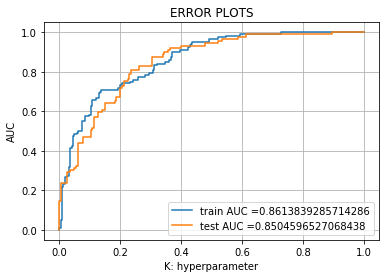

In [104]:
lr = LR(C = 0.01)
lr.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict_proba(X_train)[:, 1]    
y_test_pred = lr.predict_proba(X_test)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [105]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [106]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
i = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
print(i)
print("Test confusion matrix")
j = confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
print(j)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24992028061224486 for threshold 0.349
[[114 110]
 [  6 114]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24955004591368227 for threshold 0.424
[[123  42]
 [ 17  72]]


# CONFUSION MATRIX

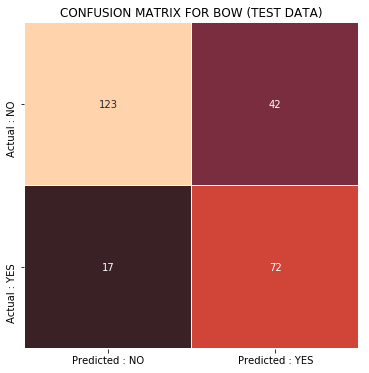

In [107]:
# Reference for heatmap was taken from seaborn heatmap documentation
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(j, columns = ['Predicted : NO', 'Predicted : YES'],
                  index = ['Actual : NO', 'Actual : YES'])
plt.figure(figsize = (6,6))
plt.title('CONFUSION MATRIX FOR BOW (TEST DATA)')
sn.heatmap(df_cm, center = 0, annot = True, linewidths=.5, cbar = False, fmt = '.0f')

# DECISION TREE CLASSIFIER

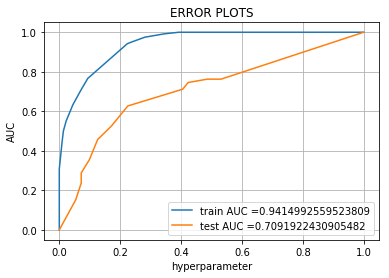

In [126]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import roc_auc_score

train_auc2 = []
cv_auc2 = []
mdepth = [2, 3, 5, 7, 9]
mss = [10, 13, 15, 17, 19]
for m in mdepth:
    for i in mss:
        dt = DT(max_depth = m, min_samples_split = i)
        dt.fit(X_train, y_train)
    
        y_train_pred = dt.predict_proba(X_train)[:, 1] 
        y_cv_pred = dt.predict_proba(X_cv)[:, 1]

        train_auc.append(roc_auc_score(y_train, y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
cv_fpr, cv_tpr, cv_thresholds = roc_curve(y_cv, y_cv_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(cv_fpr, cv_tpr, label="test AUC ="+str(auc(cv_fpr, cv_tpr)))

plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# GRIDSEARCH 

In [127]:
grid = {'min_samples_split':[10, 13, 15, 17], 'max_depth' : [2, 3, 5, 9]}

clf = GridSearchCV(estimator = dt, param_grid = grid, cv = 10, scoring = 'roc_auc',  verbose = 10, return_train_score = True)
clf.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] max_depth=2, min_samples_split=10 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=2, min_samples_split=10, score=0.7047101449275363, total=   0.1s
[CV] max_depth=2, min_samples_split=10 ...............................
[CV]  max_depth=2, min_samples_split=10, score=0.8170289855072465, total=   0.0s
[CV] max_depth=2, min_samples_split=10 ...............................
[CV]  max_depth=2, min_samples_split=10, score=0.6376811594202898, total=   0.0s
[CV] max_depth=2, min_samples_split=10 ...............................
[CV]  max_depth=2, min_samples_split=10, score=0.9094202898550725, total=   0.0s
[CV] max_depth=2, min_samples_split=10 ...............................
[CV]  max_depth=2, min_samples_split=10, score=0.7840909090909091, total=   0.0s
[CV] max_depth=2, min_samples_split=10 ...............................
[CV]  max_depth=2, min_samples_split=10, score=0.8674242424242424, total=   0.0s
[CV] max_depth=2, min_samples_split=10 ...............................
[CV]  max_depth=2, min_samples_split=10, score=0.8049242424242422, total=   0.0s
[CV] ma

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s



[CV]  max_depth=2, min_samples_split=15, score=0.7840909090909091, total=   0.0s
[CV] max_depth=2, min_samples_split=15 ...............................
[CV]  max_depth=2, min_samples_split=15, score=0.8674242424242424, total=   0.0s
[CV] max_depth=2, min_samples_split=15 ...............................
[CV]  max_depth=2, min_samples_split=15, score=0.8049242424242422, total=   0.0s
[CV] max_depth=2, min_samples_split=15 ...............................
[CV]  max_depth=2, min_samples_split=15, score=0.6363636363636362, total=   0.0s
[CV] max_depth=2, min_samples_split=15 ...............................
[CV]  max_depth=2, min_samples_split=15, score=0.7045454545454545, total=   0.0s
[CV] max_depth=2, min_samples_split=15 ...............................
[CV]  max_depth=2, min_samples_split=15, score=0.7424242424242424, total=   0.0s
[CV] max_depth=2, min_samples_split=17 ...............................
[CV]  max_depth=2, min_samples_split=17, score=0.7047101449275363, total=   0.0s
[CV] m

[CV] max_depth=5, min_samples_split=10 ...............................
[CV]  max_depth=5, min_samples_split=10, score=0.846590909090909, total=   0.0s
[CV] max_depth=5, min_samples_split=10 ...............................
[CV]  max_depth=5, min_samples_split=10, score=0.8049242424242424, total=   0.0s
[CV] max_depth=5, min_samples_split=10 ...............................
[CV]  max_depth=5, min_samples_split=10, score=0.7272727272727273, total=   0.0s
[CV] max_depth=5, min_samples_split=13 ...............................
[CV]  max_depth=5, min_samples_split=13, score=0.552536231884058, total=   0.0s
[CV] max_depth=5, min_samples_split=13 ...............................
[CV]  max_depth=5, min_samples_split=13, score=0.8659420289855072, total=   0.0s
[CV] max_depth=5, min_samples_split=13 ...............................
[CV]  max_depth=5, min_samples_split=13, score=0.6612318840579711, total=   0.0s
[CV] max_depth=5, min_samples_split=13 ...............................
[CV]  max_depth=5, 

[CV]  max_depth=9, min_samples_split=15, score=0.8278985507246376, total=   0.0s
[CV] max_depth=9, min_samples_split=15 ...............................
[CV]  max_depth=9, min_samples_split=15, score=0.7590579710144928, total=   0.0s
[CV] max_depth=9, min_samples_split=15 ...............................
[CV]  max_depth=9, min_samples_split=15, score=0.9202898550724637, total=   0.0s
[CV] max_depth=9, min_samples_split=15 ...............................
[CV]  max_depth=9, min_samples_split=15, score=0.7859848484848484, total=   0.0s
[CV] max_depth=9, min_samples_split=15 ...............................
[CV]  max_depth=9, min_samples_split=15, score=0.7840909090909092, total=   0.0s
[CV] max_depth=9, min_samples_split=15 ...............................
[CV]  max_depth=9, min_samples_split=15, score=0.8087121212121213, total=   0.0s
[CV] max_depth=9, min_samples_split=15 ...............................
[CV]  max_depth=9, min_samples_split=15, score=0.9034090909090908, total=   0.0s
[CV] ma

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    1.9s finished
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=19,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [10, 13, 15, 17], 'max_depth': [2, 3, 5, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=10)

# GRID SEARCH RESULT

In [131]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 5, 'min_samples_split': 15}
0.7986444641051568


# APPLYING GRIDSEARCH RESULT ON TEST SET

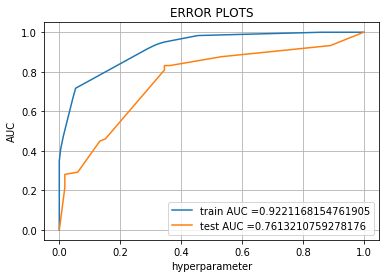

In [130]:
from sklearn.metrics import roc_curve, auc
import math


dt = DT(max_depth = 5, min_samples_split = 15)
dt.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = dt.predict_proba(X_train)[:, 1]    
y_test_pred = dt.predict_proba(X_test)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = "train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = "test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


In [132]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1 = predictions
    return predictions

In [133]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
i = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
print(i)
print("Test confusion matrix")
j = confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
print(j)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24800701530612249 for threshold 0.138
[[122 102]
 [  2 118]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24888888888888888 for threshold 0.138
[[77 88]
 [11 78]]


# CONFUSION MATRIX

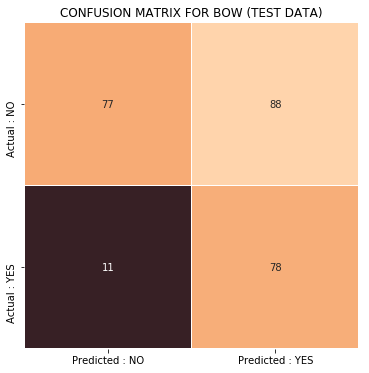

In [134]:
# Reference for heatmap was taken from seaborn heatmap documentation
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(j, columns = ['Predicted : NO', 'Predicted : YES'],
                  index = ['Actual : NO', 'Actual : YES'])
plt.figure(figsize = (6,6))
plt.title('CONFUSION MATRIX FOR BOW (TEST DATA)')
sn.heatmap(df_cm, center = 0, annot = True, linewidths=.5, cbar = False, fmt = '.0f')

# MAX VOTING

In [135]:
from sklearn.ensemble import VotingClassifier
model1 = knn
model2 = lr
model3 = dt
model = VotingClassifier(estimators = [('knn', model1), ('lr', model2), ('dt', model3)], voting = 'hard')
model.fit(X_train, y_train)
model.score(X_test, y_test)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7519685039370079